In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/445.csv')
data = data.sample(frac = 1)
data.isnull().sum()
data.drop('user', inplace=True, axis=1)


In [ ]:
print(data)

         activity     timestamp  x-axis  y-axis    z-axis
917      Standing  1.030000e+14   -0.99    9.43 -0.500000
27128     Sitting  1.020000e+14    1.42   -0.04  9.660000
51299     Walking  5.240000e+12   -6.13   11.18 -7.550000
9943     Standing  1.130000e+14   -7.70    6.28  1.120000
24098     Jogging  5.420000e+12   -0.15   -1.33  0.760000
...           ...           ...     ...     ...       ...
29690     Sitting  3.060000e+12    4.40    3.02  8.049625
29160     Sitting  3.680000e+12   -7.44   -3.98 -4.990000
57769     Walking  5.220000e+12   -0.04    3.38 -0.080000
32875     Sitting  2.090000e+14   -6.28   -3.45  6.850000
17035  Downstairs  3.370000e+12    4.29   11.84  0.890000

[59994 rows x 5 columns]


In [ ]:
data_dup = data.duplicated().any()
data = data.drop_duplicates()
print(data_dup)

True


In [ ]:
categorical=[]
numerical=[]


for column in data.columns:
  if data[column].nunique()<=10 :
    categorical.append(column)
  else:
    numerical.append(column)





In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['activity_cat'] = LE.fit_transform(data['activity'])



In [ ]:
data['activity'].unique()
data = pd.get_dummies(data,columns = categorical,drop_first = True)
data.head()

,timestamp,x-axis,y-axis,z-axis,activity_cat,activity_Jogging,activity_Sitting,activity_Standing,activity_Upstairs,activity_Walking
917,1.030000e+14,-0.99,9.43,-0.50,3,0,0,1,0,0
27128,1.020000e+14,1.42,-0.04,9.66,2,0,1,0,0,0
51299,5.240000e+12,-6.13,11.18,-7.55,5,0,0,0,0,1
9943,1.130000e+14,-7.70,6.28,1.12,3,0,0,1,0,0
24098,5.420000e+12,-0.15,-1.33,0.76,1,1,0,0,0,0


In [ ]:
data

,timestamp,x-axis,y-axis,z-axis,activity_cat,activity_Jogging,activity_Sitting,activity_Standing,activity_Upstairs,activity_Walking
917,1.030000e+14,-0.99,9.43,-0.500000,3,0,0,1,0,0
27128,1.020000e+14,1.42,-0.04,9.660000,2,0,1,0,0,0
51299,5.240000e+12,-6.13,11.18,-7.550000,5,0,0,0,0,1
9943,1.130000e+14,-7.70,6.28,1.120000,3,0,0,1,0,0
24098,5.420000e+12,-0.15,-1.33,0.760000,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5108,2.090000e+14,-8.16,5.41,-0.420000,3,0,0,1,0,0
12439,6.870000e+12,5.63,11.07,-3.060000,0,0,0,0,0,0
29690,3.060000e+12,4.40,3.02,8.049625,2,0,1,0,0,0
29160,3.680000e+12,-7.44,-3.98,-4.990000,2,0,1,0,0,0


In [ ]:

X = data.drop(['activity_cat','activity_Jogging','activity_Sitting','activity_Standing','activity_Upstairs','activity_Walking'] , axis = 1)
y = data['activity_cat']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)



In [ ]:
print(X)

          timestamp  x-axis  y-axis    z-axis
917    1.030000e+14   -0.99    9.43 -0.500000
27128  1.020000e+14    1.42   -0.04  9.660000
51299  5.240000e+12   -6.13   11.18 -7.550000
9943   1.130000e+14   -7.70    6.28  1.120000
24098  5.420000e+12   -0.15   -1.33  0.760000
...             ...     ...     ...       ...
5108   2.090000e+14   -8.16    5.41 -0.420000
12439  6.870000e+12    5.63   11.07 -3.060000
29690  3.060000e+12    4.40    3.02  8.049625
29160  3.680000e+12   -7.44   -3.98 -4.990000
17035  3.370000e+12    4.29   11.84  0.890000

[40401 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df_min_max_scale = data.copy()
for column in data.columns:
  data[column] = (df_min_max_scale[column] - df_min_max_scale[column].min())/(df_min_max_scale[column].max()-df_min_max_scale.min())

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X_train)
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)


In [ ]:
print(X_train)

[[ 2.47817359 -1.0378677  -0.16710197 -0.4568335 ]
 [-0.70960222  0.65210207 -0.25054213  0.72671639]
 [-0.70573732  0.82217155 -0.52968737  1.67203485]
 ...
 [ 0.83945276  0.61073381 -0.2095806   0.80657058]
 [ 2.47817359 -1.02101396 -0.16406779 -0.46624433]
 [-0.66956178  0.71798484  0.40029108  1.00655075]]


In [ ]:
print(X_test)

[[-0.63202346 -1.35697255  1.74323435 -0.05175612]
 [-0.65121447  2.73947523 -3.70943148 -0.91191703]
 [-0.63467588  1.62703122  0.11868942  1.15617875]
 ...
 [-0.68741214  0.90648843 -0.51661575  1.59136975]
 [-0.6788308  -0.74289111 -1.04233448 -2.09434847]
 [-0.65667533 -0.72437609  1.51517608 -2.12912587]]


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report 

LR = LogisticRegression()
LR.fit(X_train,y_train.ravel())
pred = LR.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.33      0.28      0.30      2901
           1       0.53      0.63      0.58       941
           2       0.69      0.64      0.66      1342
           3       0.60      0.69      0.64      2010
           4       0.35      0.31      0.33      2815
           5       0.55      0.63      0.59      2112

    accuracy                           0.48     12121
   macro avg       0.51      0.53      0.52     12121
weighted avg       0.47      0.48      0.48     12121



In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
k_range = range(1,50)
score=[]

for k in k_range:
  classifier= KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2 )  
  classifier.fit(X_train, y_train) 
  y_pred = classifier.predict(X_test)
  acc_score = accuracy_score(y_test,y_pred)
  score.append(acc_score)

print(score)  

[0.6756043230756539, 0.6696642191238347, 0.6904545829552017, 0.6958996782443693, 0.7061298572725022, 0.7062948601600528, 0.7133899843247257, 0.7147925088689052, 0.7168550449632869, 0.7142149987624783, 0.7171850507383879, 0.7171850507383879, 0.7177625608448148, 0.7185050738387921, 0.7199075983829717, 0.7185050738387921, 0.719990099826747, 0.719990099826747, 0.7231251546902071, 0.7221351373649039, 0.7227126474713308, 0.7225476445837802, 0.7223826416962297, 0.7219701344773534, 0.7221351373649039, 0.7212276214833759, 0.7212276214833759, 0.7219701344773534, 0.7239501691279597, 0.7228776503588813, 0.7237026647966339, 0.7234551604653081, 0.7219701344773534, 0.7213101229271512, 0.722795148915106, 0.7213926243709264, 0.7227126474713308, 0.7204851084893986, 0.7195775926078707, 0.7186700767263428, 0.7216401287022522, 0.7199075983829717, 0.7196600940516459, 0.7204026070456233, 0.7208976157082749, 0.720320105601848, 0.7200726012705222, 0.7197425954954212, 0.7185050738387921]


Text(0, 0.5, 'Testing Accuracy')

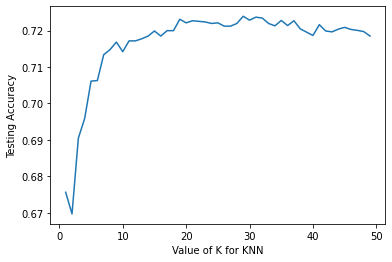

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline


plt.plot(k_range, score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.7185050738387921


In [ ]:
from sklearn  import svm
model = svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.6982097186700768


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([4, 4, 0, ..., 0, 4, 4])

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4148


In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6596


In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.6596
Test set score: 0.4148
